In [52]:
import pandas as pd

In [53]:
import numpy as np

In [54]:
pd.read_csv('C:/ex/data/기초수학.csv', encoding='cp949')

,데이터 병합,Unnamed: 1
0,NaN,NaN
1,A반,B반
2,95,91
3,92,93
4,98,97
5,100,99
6,NaN,NaN


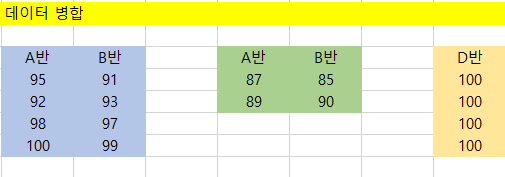

In [55]:
np.array([
          [95,91],
          [92,93],
          [98,97],
          [100,99]
])

array([[ 95,  91],
       [ 92,  93],
       [ 98,  97],
       [100,  99]])

In [56]:
arr2d = np.array([
          [95,91],
          [92,93],
          [98,97],
          [100,99]
])

In [57]:
arr2d.ndim  # 몇차원인지 확인하고 싶으면 

2

In [58]:
arr2d.shape   # 몇행 몇열인지 알고 싶은 경우

(4, 2)

In [59]:
arr2d.size

8

In [60]:
arr2d.dtype

dtype('int32')

In [61]:
pd.DataFrame(data=arr2d, columns=['A반','B반'])

,A반,B반
0,95,91
1,92,93
2,98,97
3,100,99


In [62]:
df1 = pd.DataFrame(data=arr2d, columns=['A반','B반'])

In [63]:
df1.iloc[0]   # index 개념으로 인식해서 index 0을 추출

A반    95
B반    91
Name: 0, dtype: int32

In [64]:
df1['A반']

0     95
1     92
2     98
3    100
Name: A반, dtype: int32

In [65]:
arr2d_2 = np.array([
          [87,85],
          [89,90]
])

In [66]:
arr2d_2

array([[87, 85],
       [89, 90]])

In [67]:
df2 = pd.DataFrame(data=arr2d_2, columns=['A반','B반'])

In [68]:
df2

,A반,B반
0,87,85
1,89,90


In [69]:
arr2d_4 = np.array([
          [100],
          [100],
          [100],
          [100],
])

In [70]:
arr2d_4

array([[100],
       [100],
       [100],
       [100]])

In [71]:
# help(df1.join)

In [72]:
df4 = pd.DataFrame(data=arr2d_4, columns=['D반'])

In [73]:
df4

,D반
0,100
1,100
2,100
3,100


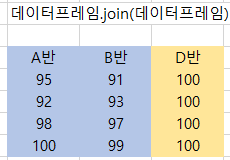

In [74]:
df1.join(df4)   # df1과 df4를 join

,A반,B반,D반
0,95,91,100
1,92,93,100
2,98,97,100
3,100,99,100


In [75]:
df2

,A반,B반
0,87,85
1,89,90


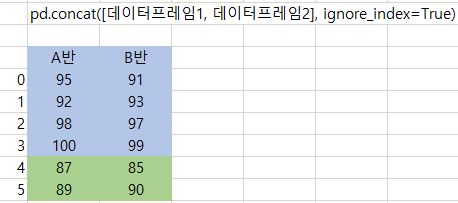

In [76]:
df1_df2 = pd.concat([df1,df2], ignore_index=True)
# ignore_index=True 를 넣지 않을 경우 인덱스가 각각의 프레임 별로 인식

In [77]:
df1_df2

,A반,B반
0,95,91
1,92,93
2,98,97
3,100,99
4,87,85
5,89,90


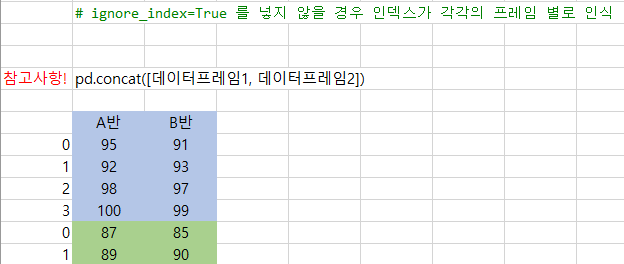

In [79]:
#  표를 만드는 일반적인 방법1

In [80]:
data1 = {'id':['hong1','hong2','hong3','hong4','hong5'],
         '이름':['홍일동','홍이동','홍삼동','홍사동','홍오동'],
         '키':[166,168,170,172,174] }

In [81]:
pd.DataFrame(data1)

,id,이름,키
0,hong1,홍일동,166
1,hong2,홍이동,168
2,hong3,홍삼동,170
3,hong4,홍사동,172
4,hong5,홍오동,174


In [97]:
df1_stu = pd.DataFrame(data1)

In [98]:
df1_stu.index

RangeIndex(start=0, stop=5, step=1)

In [99]:
df1_stu.set_index('id', inplace=True)

In [100]:
df1_stu

,이름,키
id,,
hong1,홍일동,166
hong2,홍이동,168
hong3,홍삼동,170
hong4,홍사동,172
hong5,홍오동,174


In [82]:
#  표를 만드는 일반적인 방법2

In [86]:
idx = ['hong1','hong2','hong3','hong4','hong5']

In [87]:
data2 = {
         '이름':['홍일동','홍이동','홍삼동','홍사동','홍오동'],
         '키':[166,168,170,172,174] }

In [90]:
pd.DataFrame(data2, index=pd.Index((idx), name='student'))

,이름,키
student,,
hong1,홍일동,166
hong2,홍이동,168
hong3,홍삼동,170
hong4,홍사동,172
hong5,홍오동,174


In [108]:
# A와 B 데이터 병합

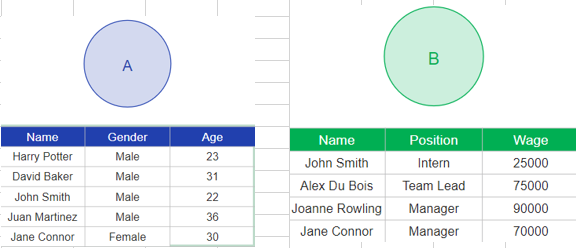

In [109]:
A = pd.DataFrame({'Name':['Harry Potter','David Baker','John Smith','Juan Martinez','Jane Connor'],
              'Gender' : ['Male','Male','Male','Male','Female'],
              'Age' : [23,31,22,36,30] })

In [110]:
A

,Name,Gender,Age
0,Harry Potter,Male,23
1,David Baker,Male,31
2,John Smith,Male,22
3,Juan Martinez,Male,36
4,Jane Connor,Female,30


In [111]:
B = pd.DataFrame({'Name':['John Smith','Alex Du Bois','Joanne Rowling','Jane Connor'],
              'Position' : ['Intern','Team Lead','Manager','Manager'],
              'Wage' : [25000,75000,90000,70000] })

In [112]:
B

,Name,Position,Wage
0,John Smith,Intern,25000
1,Alex Du Bois,Team Lead,75000
2,Joanne Rowling,Manager,90000
3,Jane Connor,Manager,70000


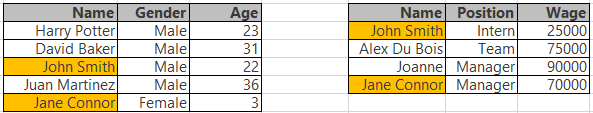

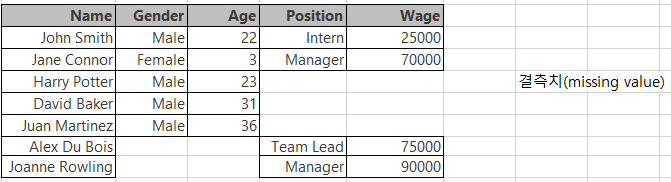

In [117]:
A.merge(B,on='Name',how='inner')     # 결측치가 없는 경우 : inner

,Name,Gender,Age,Position,Wage
0,John Smith,Male,22,Intern,25000
1,Jane Connor,Female,30,Manager,70000


In [118]:
A.merge(B,on='Name',how='left')     # 왼쪽을 기준으로 결측치 없는 것을 추출

,Name,Gender,Age,Position,Wage
0,Harry Potter,Male,23,NaN,NaN
1,David Baker,Male,31,NaN,NaN
2,John Smith,Male,22,Intern,25000.0
3,Juan Martinez,Male,36,NaN,NaN
4,Jane Connor,Female,30,Manager,70000.0


In [119]:
A.merge(B,on='Name',how='right')   # 오른쪽을 기준으로 결측치 없는 것을 추출

,Name,Gender,Age,Position,Wage
0,John Smith,Male,22.0,Intern,25000
1,Alex Du Bois,NaN,NaN,Team Lead,75000
2,Joanne Rowling,NaN,NaN,Manager,90000
3,Jane Connor,Female,30.0,Manager,70000


In [120]:
A.merge(B,on='Name',how='outer')   # 전체 추출

,Name,Gender,Age,Position,Wage
0,Alex Du Bois,NaN,NaN,Team Lead,75000.0
1,David Baker,Male,31.0,NaN,NaN
2,Harry Potter,Male,23.0,NaN,NaN
3,Jane Connor,Female,30.0,Manager,70000.0
4,Joanne Rowling,NaN,NaN,Manager,90000.0
5,John Smith,Male,22.0,Intern,25000.0
6,Juan Martinez,Male,36.0,NaN,NaN


In [114]:
A.merge(B,on='Name')

,Name,Gender,Age,Position,Wage
0,John Smith,Male,22,Intern,25000
1,Jane Connor,Female,30,Manager,70000


In [121]:
# 엑셀에서 데이터 가져오기(1학기,2학기)

In [124]:
st1 = pd.read_csv('C:/ex/data/1학기.csv',encoding='cp949')

In [125]:
st1

,학생,국,영,수
0,A,80,90,85
1,B,90,95,95
2,C,95,70,75
3,D,70,85,80
4,E,75,90,85


In [126]:
st2 = pd.read_csv('C:/ex/data/2학기.csv',encoding='cp949')

In [127]:
st2

,학생,국,영,수
0,A,80,90,85
1,B,90,95,95
2,C,95,70,75
3,D,70,85,80
4,E,75,90,85


In [213]:
score = pd.read_excel('C:/ex/data/score_test.xlsx')

In [214]:
score

,학생,국,영,수
0,A,80,90,85
1,B,90,95,95
2,C,95,70,75
3,D,70,85,80
4,E,75,90,85


In [135]:
pd.read_excel('C:/ex/data/score_test.xlsx',sheet_name='1학기')

,학생,국,영,수
0,A,80,90,85
1,B,90,95,95
2,C,95,70,75
3,D,70,85,80
4,E,75,90,85


In [136]:
pd.read_excel('C:/ex/data/score_test.xlsx',sheet_name='2학기')

,학생,국,영,수
0,A,80,90,85
1,B,90,95,95
2,C,95,70,75
3,D,70,85,80
4,E,75,90,85


In [137]:
# 1. 학생별 평균
# 2. 과목별 평균
# 3. 반 평균
# 4. 국어 성적순 정렬
# 5. 학생 평균 성적 정렬

In [168]:
#  a 학생 평균 국+영+수/3 
score_a = (score.iloc[0]['국']+score.iloc[0]['영']+score.iloc[0]['수'])/3
#  b 학생 평균 
score_b = (score.iloc[1]['국']+score.iloc[1]['영']+score.iloc[1]['수'])/3
#  c 학생 평균
score_c = (score.iloc[2]['국']+score.iloc[2]['영']+score.iloc[2]['수'])/3
#  d 학생 평균
score_d = (score.iloc[3]['국']+score.iloc[3]['영']+score.iloc[3]['수'])/3
#  E 학생 평균
score_e = (score.iloc[4]['국']+score.iloc[4]['영']+score.iloc[4]['수'])/3

In [170]:
#  1.
print("a 학생은:" ,score_a)
print("b 학생은:" ,score_b)
print("c 학생은:" ,score_c)
print("d 학생은:" ,score_d)
print("e 학생은:" ,score_e)
# 2.
print("반평균:" ,(score_a+score_b+score_c+score_d+score_e)/5)

a 학생은: 85.0
b 학생은: 93.33333333333333
c 학생은: 80.0
d 학생은: 78.33333333333333
e 학생은: 83.33333333333333
반평균: 83.99999999999999


In [179]:
score['국'][0]+score['국'][1]+score['국'][2]+score['국'][3]+score['국'][4]

410

In [185]:
score_idx = score.set_index('학생')

In [186]:
score_idx

,국,영,수
학생,,,
A,80,90,85
B,90,95,95
C,95,70,75
D,70,85,80
E,75,90,85


In [187]:
score_idx.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object', name='학생')

In [188]:
score_idx.loc['A']

국    80
영    90
수    85
Name: A, dtype: int64

In [191]:
print("%.2f" % score_idx.loc['A'].mean())
print("%.2f" % score_idx.loc['B'].mean())
print("%.2f" % score_idx.loc['C'].mean())
print("%.2f" % score_idx.loc['D'].mean())
print("%.2f" % score_idx.loc['E'].mean())

85.00
93.33
80.00
78.33
83.33


In [192]:
score.values

array([['A', 80, 90, 85],
       ['B', 90, 95, 95],
       ['C', 95, 70, 75],
       ['D', 70, 85, 80],
       ['E', 75, 90, 85]], dtype=object)

In [193]:
score_drop = score.drop('학생', axis=1)

In [194]:
score_drop

,국,영,수
0,80,90,85
1,90,95,95
2,95,70,75
3,70,85,80
4,75,90,85


In [195]:
score_drop.values

array([[80, 90, 85],
       [90, 95, 95],
       [95, 70, 75],
       [70, 85, 80],
       [75, 90, 85]], dtype=int64)

In [196]:
score_drop.values.mean()

84.0

In [199]:
score.sort_values(by='국',ascending=False)

,학생,국,영,수
2,C,95,70,75
1,B,90,95,95
0,A,80,90,85
4,E,75,90,85
3,D,70,85,80


In [201]:
score_mean = [score_idx.loc['A'].mean(),score_idx.loc['B'].mean(),score_idx.loc['C'].mean(),score_idx.loc['D'].mean(),score_idx.loc['E'].mean()]

In [203]:
score['score_mean'] = score_mean

In [204]:
score

,학생,국,영,수,score_mean
0,A,80,90,85,85.000000
1,B,90,95,95,93.333333
2,C,95,70,75,80.000000
3,D,70,85,80,78.333333
4,E,75,90,85,83.333333


In [206]:
score.sort_values(by='score_mean', ascending=False)

,학생,국,영,수,score_mean
1,B,90,95,95,93.333333
0,A,80,90,85,85.000000
4,E,75,90,85,83.333333
2,C,95,70,75,80.000000
3,D,70,85,80,78.333333


In [208]:
# 데이터 요약시 유용한 피벗테이블

In [209]:
import pandas as pd

In [211]:
# help(pd.pivot_table)

In [221]:
# 피벗테이블 기초

In [235]:
data = { 'Date': ['2023-01-01', '2023-01-01','2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03'],
         'Category': ['A', 'B', 'A','A', 'B', 'A'], 'Value': [10, 20,50, 15, 25, 10] }

In [236]:
df = pd.DataFrame(data)

In [237]:
df

,Date,Category,Value
0,2023-01-01,A,10
1,2023-01-01,B,20
2,2023-01-01,A,50
3,2023-01-02,A,15
4,2023-01-02,B,25
5,2023-01-03,A,10


In [238]:
df.columns

Index(['Date', 'Category', 'Value'], dtype='object')

In [239]:
pd.pivot_table(df, values='Value', index='Date',
                columns='Category', aggfunc='mean')

Category,A,B
Date,,
2023-01-01,30.0,20.0
2023-01-02,15.0,25.0
2023-01-03,10.0,NaN


In [240]:
# 데이터프레임객체.통계관련 메서드

In [241]:
df_stu_score_1 = pd.read_excel('C:/ex/data/score_test.xlsx',sheet_name='1학기')

In [242]:
df_stu_score_1

,학생,국,영,수
0,A,80,90,85
1,B,90,95,95
2,C,95,70,75
3,D,70,85,80
4,E,75,90,85


In [245]:
df_stu_score_1.drop('학생',axis=1, inplace=True)

In [246]:
df_stu_score_1

,국,영,수
0,80,90,85
1,90,95,95
2,95,70,75
3,70,85,80
4,75,90,85


In [247]:
df_stu_score_1.mean(axis=1)

0    85.000000
1    93.333333
2    80.000000
3    78.333333
4    83.333333
dtype: float64

In [248]:
df_stu_score_1.mean(axis=0)

국    82.0
영    86.0
수    84.0
dtype: float64

In [250]:
df_stu_score_1.values.mean()

84.0